# Decision Trees with Ford Data

In [68]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression



In [69]:
Ford = pd.read_csv("Ford_Cleaned_Date.csv")
Ford.date = pd.to_datetime(Ford.date)
Ford = Ford.set_index("date")
Ford = Ford.iloc[14:, :]
Ford = Ford.drop(["Nas_total", 'Stock_total', 'Dow_total'],axis=1) # to remove duplicated columns

In [70]:
Ford = Ford.dropna()
Ford = Ford[~(Ford.isin([np.inf, -np.inf]).any(axis=1))] 

In [71]:
Ford.shape

(709, 166)

## DT Target_3

In [72]:
Ford = Ford.drop(['target_1', 'target_2', 'target_4', 'target_5'], axis=1)
target_3 = Ford["target_3"]

#splitting into training sets 
column_indices = {name: i for i, name in enumerate(Ford.columns)}

n = len(Ford)
X_train = Ford[0:int(n*0.9)]

X_test = Ford[int(n*0.9):]

y_train = target_3[0:int(n*0.9)]

y_test = target_3[int(n*0.9):]

In [73]:
counts = y_train.groupby(by = y_train).count()
counts = pd.Series(counts)
print(counts)

target_3
0    330
1    308
Name: target_3, dtype: int64


In [74]:
Mscaler = MinMaxScaler() # keeps binarys at zero and 1 :)

X_train = pd.DataFrame(Mscaler.fit_transform(X_train), columns = Ford.columns)
X_test = pd.DataFrame(Mscaler.fit_transform(X_test), columns = Ford.columns)

In [75]:
corr_matrix = X_train.corr()
corr_matrix

,Ford,F-150,Ford Bronco_x,Ford Mustang_x,Ford Stock,Open,High,Low,Close,Volume,...,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_EMA_Move,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_3
Ford,1.000000,0.055530,0.303091,0.203195,0.143298,0.010524,0.010353,0.011126,0.011503,0.026041,...,0.004212,0.000721,0.012264,0.081840,0.053224,0.078331,-0.023868,-0.005256,-0.001664,-0.013346
F-150,0.055530,1.000000,0.029974,0.083337,0.051831,0.008371,0.010114,0.008181,0.008227,0.042126,...,0.019319,0.030861,-0.053418,-0.041889,-0.067631,-0.038095,-0.025702,-0.071468,0.029174,0.020247
Ford Bronco_x,0.303091,0.029974,1.000000,-0.002140,0.077278,-0.145593,-0.144943,-0.148706,-0.146625,0.122505,...,0.045998,0.001664,0.032298,0.043726,0.063731,0.047417,-0.012320,0.004763,0.046948,0.011493
Ford Mustang_x,0.203195,0.083337,-0.002140,1.000000,-0.042624,0.034321,0.032292,0.035977,0.033809,-0.029659,...,-0.033294,-0.012441,-0.012012,0.052654,0.008364,-0.008286,-0.027281,-0.003401,-0.023172,-0.040515
Ford Stock,0.143298,0.051831,0.077278,-0.042624,1.000000,-0.020361,-0.012056,-0.024015,-0.017820,0.273009,...,0.029172,-0.028680,0.009628,0.003761,-0.015070,0.019798,-0.011771,-0.043662,-0.043738,-0.043700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dow_EMA_Move,0.078331,-0.038095,0.047417,-0.008286,0.019798,-0.007689,-0.003735,0.000116,0.004701,-0.023049,...,-0.219005,0.061855,0.457231,0.630811,0.571714,1.000000,0.188460,0.127774,-0.128961,-0.024764
Dow_Disparity_Move,-0.023868,-0.025702,-0.012320,-0.027281,-0.011771,-0.034857,-0.029958,-0.027774,-0.021483,-0.045889,...,-0.026343,0.034558,0.684861,0.095261,0.346229,0.188460,1.000000,0.689436,-0.247025,0.004333
Dow_Disparity_s_Move,-0.005256,-0.071468,0.004763,-0.003401,-0.043662,-0.034429,-0.029821,-0.028268,-0.021164,-0.016133,...,-0.027871,0.030772,0.651924,0.093663,0.295795,0.127774,0.689436,1.000000,-0.256670,0.046095
Dow_RSI_Move,-0.001664,0.029174,0.046948,-0.023172,-0.043738,0.007763,0.008023,0.005319,0.004846,0.034550,...,0.042829,0.080299,-0.293303,-0.133400,-0.197153,-0.128961,-0.247025,-0.256670,1.000000,-0.049546


### Creating variables based on corrlation with target

In [76]:
#Top 40 variables by correlation with the target

feats_corr = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[0:40]).reset_index()['index'])

In [77]:
feats_corr

['target_3',
 'Dow_rs',
 'Stock_Disparity_s_Move',
 'Wiki_RSI',
 'Dow_avg_loss',
 'Nas_Disparity_s_Move',
 'Wiki_Disparity_Move',
 'Nas_avg_loss',
 'Dow_Disparity_s_Move',
 'Nas_Move',
 'Ford Bronco_y',
 'Google_Rocp',
 'Stock_rs',
 'Google_avg_gain',
 'Google_Disparity_s_Move',
 'Wiki_diff',
 'Dividends',
 'Google_RSI_Move',
 'Wiki_gain',
 'Wiki_RSI_Move',
 'Wiki_Move',
 'Nas_Disparity_Move',
 'Dow_Move',
 'Wiki_Disparity_s',
 'Wiki_Disparity_s_Move',
 'Nas_EMA_Move',
 'F-150',
 'Nas_rs',
 'Nas_MAvg',
 'Nas_MAvg_s',
 'Nas_EMA',
 'nas_high',
 'nas_open',
 'nas_close',
 'nas_low',
 'Nas_diff',
 'Nas_gain',
 'Dow_MAvg_s_Move',
 'Ford Bronco_x',
 'Nas_loss']

In [78]:
X_train_cr = X_train[feats_corr]
X_test_cr = X_test[feats_corr]

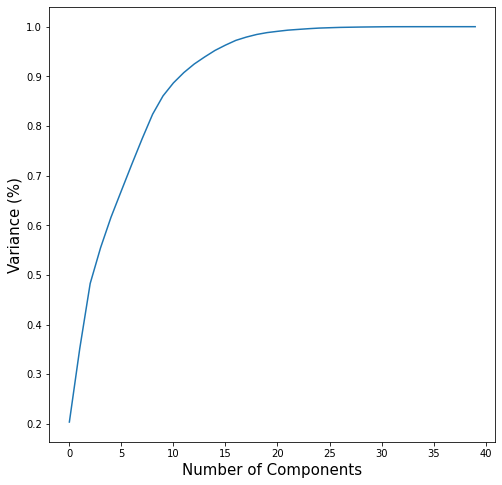

array([ 20.36922168,  35.1823496 ,  48.2705563 ,  55.48134521,
        61.61255725,  66.9703683 ,  72.28473296,  77.45404755,
        82.36457898,  86.05730117,  88.6763723 ,  90.75327418,
        92.48290759,  93.90102682,  95.2225738 ,  96.28759094,
        97.24312659,  97.90016942,  98.4309014 ,  98.80768974,
        99.06508934,  99.30194924,  99.45249511,  99.59824817,
        99.71952007,  99.78968488,  99.85666108,  99.89327774,
        99.92847979,  99.95304852,  99.97624856,  99.99410619,
        99.99626066,  99.99834317,  99.99895299,  99.99944781,
        99.99971812,  99.99987081, 100.        , 100.        ])

In [79]:
pca = PCA().fit(X_train_cr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()
np.cumsum(pca.explained_variance_ratio_) * 100
# 10 compenents explain 85% 

In [80]:
pca_cr = PCA(n_components = 10).fit(X_train_cr.to_numpy())
X_train_cr = pca_cr.transform(X_train_cr.to_numpy())
X_test_cr = pca_cr.transform(X_test_cr.to_numpy())

### Creating varaibles based on kbest

In [81]:
# apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=f_regression, k=40)
best_fit = bestfeatures.fit(X_train, y_train)
best_scores = pd.DataFrame(best_fit.scores_)
best_columns = pd.DataFrame(Ford.columns)

# concatenate the dataframes for better visualization
features_score = pd.concat([best_columns, best_scores], axis=1)
features_score.columns = ['Features', 'Score'] 
feats_kb = list(features_score.nlargest(40, 'Score')['Features'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [82]:
X_train_kb = X_train[feats_kb]
X_test_kb = X_test[feats_kb]

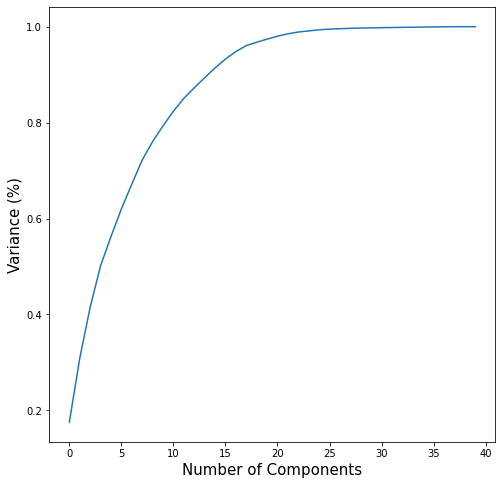

array([ 17.5637282 ,  30.88352645,  41.52099116,  50.15616196,
        56.23961292,  62.00375889,  67.16842618,  72.19563268,
        76.03828094,  79.33653016,  82.3713478 ,  85.05650887,
        87.25554077,  89.36162288,  91.40099653,  93.24731351,
        94.80783644,  96.05826256,  96.76142049,  97.40509937,
        98.02139107,  98.5093007 ,  98.89131932,  99.12188529,
        99.34491914,  99.4906033 ,  99.58185011,  99.65635357,
        99.70942859,  99.7517204 ,  99.79141241,  99.82824057,
        99.86065506,  99.89186865,  99.92196116,  99.95021746,
        99.97596528, 100.        , 100.        , 100.        ])

In [83]:
pca = PCA().fit(X_train_kb)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()
np.cumsum(pca.explained_variance_ratio_) * 100
# 9 compenents explain 85% 

In [84]:
pca_kb = PCA(n_components = 9).fit(X_train_kb.to_numpy())
X_train_kb = pca_kb.transform(X_train_kb.to_numpy())
X_test_kb = pca_kb.transform(X_test_kb.to_numpy())

## Modeling Correlated Variables 

In [87]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 1200, 15, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train_cr,y_train)

model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   3.1s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   3.1s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   3.1s
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.953 total time=   3.1s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.984 total time=   3.3s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   3.3s

{'n_estimators': 945,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 406,
 'criterion': 'entropy'}

In [92]:
y_cr_hat = model.best_estimator_.predict(X_test_cr)
y_cr_hat

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0])

In [91]:
accuracy_score(y_test, y_cr_hat)

0.9859154929577465

In [94]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 1200, 15, dtype = int))}

clf = RandomForestClassifier()
model_kb = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb.fit(X_train_kb,y_train)

model_kb.best_params_

y_kb_hat = model_kb.best_estimator_.predict(X_test_kb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   4.5s
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.984 total time=   4.6s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   4.7s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   4.6s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   3.1s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=1.000 total time=   3.1s

In [95]:
accuracy_score(y_test, y_kb_hat)

1.0